# Convert Models in Protocol 2
We will open and resave all model objects in protocol 2, so that they can be used from python 2.
For curiosity I will compare the file size and loading speed.

In [16]:
import os
from glob import glob
from sklearn.externals import joblib
import pandas as pd
from matplotlib import pyplot as plt
from time import time

In [17]:
proj_root = os.path.abspath(os.path.join('../')) 
modeldir = os.path.join(proj_root, 'models/')
prot2dir = os.path.join(modeldir, 'prot2')

if not os.path.isdir(modeldir): os.makedirs(modeldir)
if not os.path.isdir(prot2dir): os.makedirs(prot2dir)

In [18]:
for from_file in glob(os.path.join(modeldir, '*.pkl')):
    print(os.path.basename(from_file))
    model = joblib.load(from_file)
    out_file = os.path.join(prot2dir, os.path.basename(from_file)) 
    joblib.dump(model, out_file, protocol=2)

caption-en-letter_pca-mlp-full.pkl
caption-en-paren_pca-mlp-full.pkl
caption-en_pca-loose-mlp-full.pkl
caption-en_pca-mlp-full.pkl
caption-ja-loose_pca-mlp-full.pkl
caption-ja_pca-mlp-full.pkl
caption-ja_pca-mlp-step1-full.pkl
caption-ja_pca-mlp-step2-full.pkl
caption_pca-mlp-gridbest.pkl
label_mlp-full.pkl
label_mlp-gridbest.pkl
label_mlp.pkl
label_nb.pkl
label_pca-mlp-full.pkl
label_pca-mlp.pkl


## Compare size difference

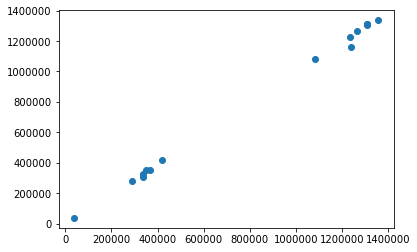

0     1.068447
1     1.005159
2     1.045256
3     1.024882
4     1.030306
5     1.002568
6     1.002317
7     1.001636
8     1.006971
9     1.015849
10    1.000444
11    1.000643
12    1.000000
13    1.097722
14    1.002428
dtype: float64


,file,size_prot2,size_prot3
0,caption-en-letter_pca-mlp-full.pkl,1236955,1157713
1,caption-en-paren_pca-mlp-full.pkl,1234185,1227851
2,caption-en_pca-loose-mlp-full.pkl,367145,351249
3,caption-en_pca-mlp-full.pkl,335899,327744
4,caption-ja-loose_pca-mlp-full.pkl,289989,281459
5,caption-ja_pca-mlp-full.pkl,1306924,1303577
6,caption-ja_pca-mlp-step1-full.pkl,1267058,1264129
7,caption-ja_pca-mlp-step2-full.pkl,1083996,1082225
8,caption_pca-mlp-gridbest.pkl,418763,415864
9,label_mlp-full.pkl,1358001,1336814


In [19]:
data = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(file3))
    data.append({'file':os.path.basename(file3), 
                 'size_prot3':os.path.getsize(file3), 
                 'size_prot2':os.path.getsize(file2), })
data = pd.DataFrame(data)
plt.scatter(data['size_prot2'], data['size_prot3'])
plt.show()

print(data['size_prot2'] / data['size_prot3'])
data

Hmm, almost same size (up to 1.1% size difference)

## Compare load speed 

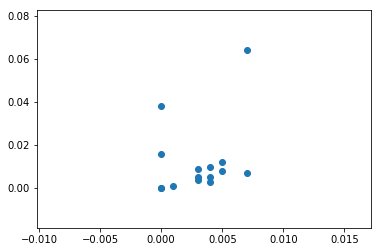

0     0.109375
1     0.333360
2     0.416680
3     0.400005
4     1.000000
5     0.625007
6     0.800029
7     0.599981
8     0.749985
9     0.000000
10         NaN
11    0.000000
12         NaN
13    1.000000
14    1.333360
dtype: float64


,file,time_prot2,time_prot3
0,caption-en-letter_pca-mlp-full.pkl,0.007001,0.064006
1,caption-en-paren_pca-mlp-full.pkl,0.003000,0.009001
2,caption-en_pca-loose-mlp-full.pkl,0.005001,0.012001
3,caption-en_pca-mlp-full.pkl,0.004000,0.010001
4,caption-ja-loose_pca-mlp-full.pkl,0.007001,0.007001
5,caption-ja_pca-mlp-full.pkl,0.005001,0.008001
6,caption-ja_pca-mlp-step1-full.pkl,0.004000,0.005000
7,caption-ja_pca-mlp-step2-full.pkl,0.003000,0.005001
8,caption_pca-mlp-gridbest.pkl,0.003000,0.004000
9,label_mlp-full.pkl,0.000000,0.038201


In [20]:
data2 = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(from_file))
    s = time()
    joblib.load(file3)
    time3 = time()-s
    
    s = time()
    joblib.load(file2)
    time2 = time()-s
    data2.append({'file':os.path.basename(file3), 
                'time_prot3':time3, 
                'time_prot2':time2})    
data2 = pd.DataFrame(data2)

plt.scatter(data2['time_prot2'], data2['time_prot3'])
plt.show()

print(data2['time_prot2'] / data2['time_prot3'])

data2

About 3 to 5 times faster load for protocol 3!